<a href="https://colab.research.google.com/github/varunsivashankar/Measuring-Spring-Damping/blob/master/Measuring_Damping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mounting google drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
import numpy as np
read_in_array = np.loadtxt('/content/drive/My Drive/magnetic_Damper3.csv',skiprows=1,delimiter=',')


In [0]:
#Create the two data columns

import statistics as st

time = read_in_array[:,0]
time = (time - min(time))/1000 # time is in microseconds so must be converted

ultrasound = read_in_array[:,4]
ultrasound = ultrasound/1000 #ultrasound is in millimeters so must be converted
ultrasound = ultrasound - st.mean(ultrasound) #centre data around 0

Text(0, 0.5, 'Distance (m)')

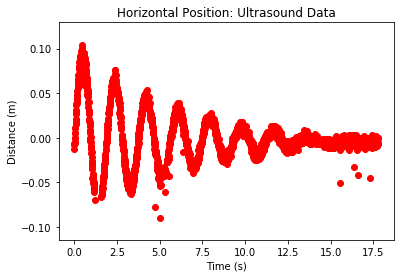

In [0]:
import matplotlib.pyplot as plt

plt.scatter(time,ultrasound,color="red")

plt.title('Horizontal Position: Ultrasound Data')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

In [0]:
# We will now find the best fit equation to the data

# The equation that an oscillating object under damping follows
def damp_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  gamma = parameters[4]
  y = np.multiply(np.exp(-gamma * time), a * np.sin(omega * time + phi) + offset)
  return y

# Returns difference between guess function and the actual data
def get_residuals(parameters, position_data, time_data):
  # obtain sin function based on parameters
  theoretical_function = damp_fit_fun(parameters, time_data)
  # store the differences in absolute value between original data values and predicted values
  residuals = np.abs(theoretical_function - position_data)
  # return these difference values
  return residuals


In [0]:
# initial guesses
guess_amplitude = 0.7
guess_omega = 6.5
guess_offset = 0
guess_phi = 8
guess_gamma = 0.05

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi, guess_gamma]

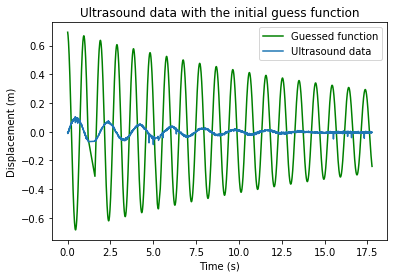

In [0]:
# Graph of initial guess function and actual data

theoretical_guess_function = damp_fit_fun(guess_parameters, time)
plt.plot(time, theoretical_guess_function,color="green",label="Guessed function")

plt.plot(time, ultrasound, label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound data with the initial guess function")
plt.legend()

In [0]:
#obtain best parameters

from scipy.optimize import least_squares
res_lsq = least_squares(get_residuals, guess_parameters, args=(ultrasound,time))

best_parameters = res_lsq['x']

Best Amplitude: -0.10934376764300381
Best Omega: 3.3803536116076742
Best offset: -0.006004065854468719
Best Phi: 9.315084200996505
Best Gamma: 0.1956601314611426


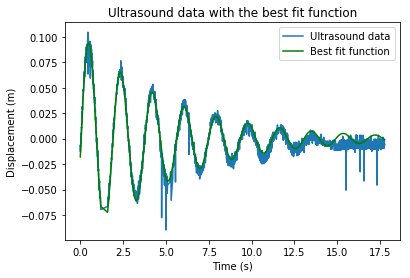

In [0]:
# Plotting the actual data and the best fit function

fitted_function = damp_fit_fun(best_parameters, time)

plt.plot(time, ultrasound,label="Ultrasound data")
plt.plot(time, fitted_function, color = 'green', label="Best fit function")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.title("Ultrasound data with the best fit function")

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))
print('Best Gamma: ' + str(best_parameters[4]))